In [1]:
from menu_solver import MenuSolver
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

* [x] ≥ 1 mudah dalam sehari
* [x] ≤ 1 sulit dalam sehari
* [ ] 4 minggu
* [ ] ≥ 1 sayur dalam sehari (atau diganti buah)
* [ ] jajanan setiap dua kali sehari
* [x] = 2 menu yang menggunakan bahan yang sama dalam seminggu
* [x] menu yang sama tidak berurutan
* [ ] 2 seafood per minggu
* [ ] 2 takeaways per minggu

In [2]:
base_url = 'https://docs.google.com/spreadsheets/d/1Uz-k2SuEuEut6YEiVfshI4kQFYLxEFvMXGcEe32bCGo/pub?gid={}&single=true&output=csv'
difficulty_df = pd.read_csv(base_url.format('416476293'), skiprows=1, names=['menu_id', 'difficulty'])
ingredient_df = pd.read_csv(base_url.format('610644228'), skiprows=1, names=['menu_id', 'ingredient'])
category_df = pd.read_csv(base_url.format('1564738075'), skiprows=1, names=['menu_id', 'category'])
menu_df = pd.read_csv(base_url.format('828676903'), skiprows=1, names=["menu_id", "waktu"])
difficulty_dict = np.vectorize(difficulty_df.set_index('menu_id').difficulty.to_dict().get)

n_days = 14
n_candidates = 10
n_fittest = 5
n_iter = 100
p_mutation = 0.1

solver = MenuSolver(
    menu_df,
    difficulty_dict,
    n_days,
    n_candidates,
    n_fittest,
    n_iter,
    p_mutation
)

In [3]:
result = solver.run()
result

  9%|█████▏                                                   | 9/100 [00:00<00:01, 56.10it/s]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Mac & cheese,Sandwich - Tuna,Tuna quesadilla,Nasi uduk + sambal goreng udang,Nasi kuning + Sambal goreng udang,Apple turnover,Pasta - Tuna,Roasted potatoes + Omelette,Sandwich - Udang,Mashed potatoes caserole,Tuna quesadilla,Garlic Butter Rice + mayak egg,Sandwich - Udang,Sup ayam jagung + Garlic Bread
1,Tumis pok choy + Nugget,Udang saus mentega,Bakso,Sayur bayam + Tempe,Capcay,Katsu dan kari,Sop Merah + Garlic Bread,Udang saus tiram,Cap Cay + katsu,Ayam goreng tepung,Honey garlic salmon,Ayam goreng tepung,Kari ayam,Chili con carne
2,Pho,Mun tahu,Batagor,Honey sesame chicken,Sayur bayam + Bakwan udang,Tumis buncis daging giling,Katsu-don,Honey sesame chicken,Pasta - Bolognese,Tahu Telor Surabaya,One-pot pasta,Puff pastry pizza,Ayam asam manis,Ketoprak


In [4]:
for i, row in result.T.iterrows():
    print(f"Day {i+1}")
    print(row[0])
    print(row[1])
    print(row[2])
    print()

Day 1
Mac & cheese
Tumis pok choy + Nugget
Pho

Day 2
Sandwich - Tuna
Udang saus mentega
Mun tahu

Day 3
Tuna quesadilla
Bakso
Batagor

Day 4
Nasi uduk + sambal goreng udang
Sayur bayam + Tempe
Honey sesame chicken

Day 5
Nasi kuning + Sambal goreng udang
Capcay
Sayur bayam + Bakwan udang

Day 6
Apple turnover
Katsu dan kari
Tumis buncis daging giling

Day 7
Pasta - Tuna
Sop Merah + Garlic Bread
Katsu-don

Day 8
Roasted potatoes + Omelette
Udang saus tiram
Honey sesame chicken

Day 9
Sandwich - Udang
Cap Cay + katsu
Pasta - Bolognese

Day 10
Mashed potatoes caserole
Ayam goreng tepung
Tahu Telor Surabaya

Day 11
Tuna quesadilla
Honey garlic salmon
One-pot pasta

Day 12
Garlic Butter Rice + mayak egg
Ayam goreng tepung
Puff pastry pizza

Day 13
Sandwich - Udang
Kari ayam 
Ayam asam manis

Day 14
Sup ayam jagung + Garlic Bread
Chili con carne
Ketoprak



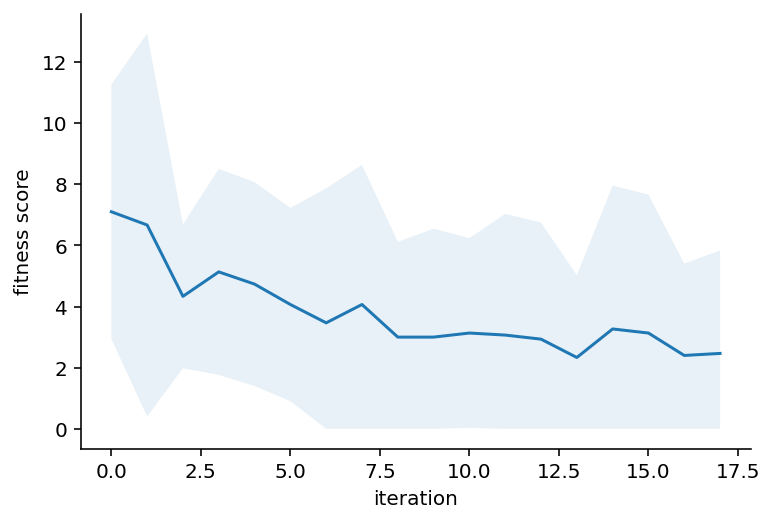

In [5]:
sh = solver.score_history_
plt.plot(sh.index, sh['mean'])
plt.fill_between(
    sh.index,
    np.clip(sh['mean'] - 2 * sh['std'], 0, None),
    sh['mean'] + 2 * sh['std'],
    alpha=.1
)
plt.xlabel('iteration')
plt.ylabel('fitness score')
plt.show()

In [10]:
list(category_df.query('category == "Jajanan"').sample(5).menu_id.values)

['Apple crumble', 'Banana bread', 'Bolen pisang', 'Umm Ali', 'Risol rogut']